# Data Maker

This code generates log-magnitude specrtogram starting from amplitude-time impulse responses.

In [1]:
import torch

import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.io import wavfile

import librosa

import os

import gc
import pickle

import utils.irutilities as irutil

from pathlib import Path

In [ ]:

# Specify the path to the spectrograms file
spectrograms_file = 'mesh_rir/S32-M441_npy/spectrograms.npy'

# Load the spectrograms
spectrograms = np.load(spectrograms_file)


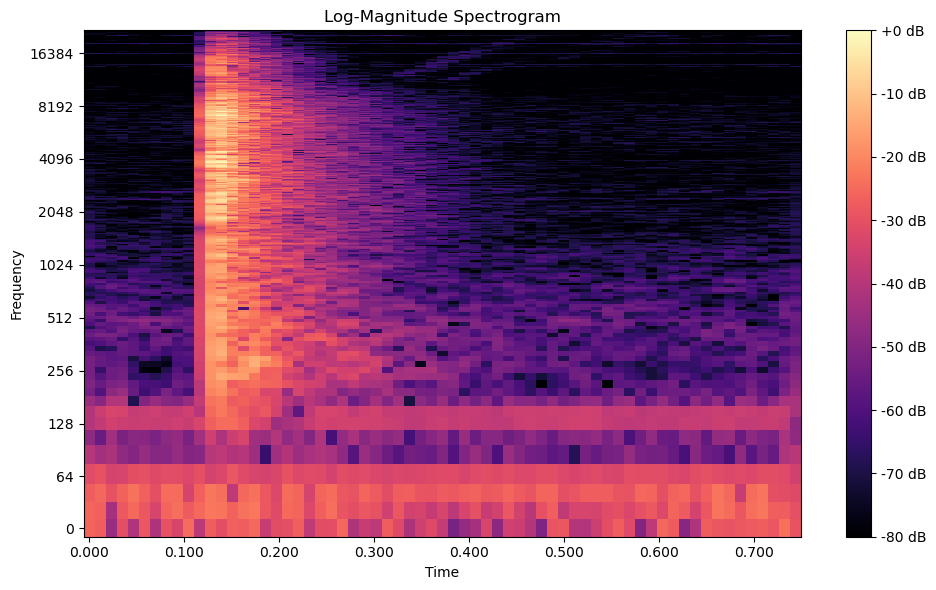

In [3]:

spec = spectrograms[12,100,:]

plt.imshow(spec, cmap='hot', interpolation='nearest')

# Add colorbar for reference
plt.colorbar()

# Show the heatmap
plt.show()

In [ ]:
file_name = 'nuvole.mp3'

folder_name = os.path.splitext(file_name)[0]
dataset_path = 'dataset'

# Check if the folder exists
folder_path = os.path.join(dataset_path, folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Created folder: {folder_path}")
else:
    is_empty = len(os.listdir(folder_path)) == 0
    if is_empty:
        print(f"Folder '{folder_path}' is empty.")
    else:
        print(f"Folder '{folder_path}' is not empty.")
        
raw_data_path = Path('mesh_rir/')

inputPath = raw_data_path.joinpath('S32-M441_npy')

posMic, posSrc, ir = irutil.loadIR(inputPath)
samplerate = 48000

print('mics: ', posMic.shape)
print('sources :', posSrc.shape)

In [ ]:

# Generate the time axis for plotting
sample_rate = 48000
duration = len(ir[0,0,:]) / sample_rate
time = np.linspace(0, duration, len(ir[0,0,:]))

# Plot the audio waveform
plt.plot(time, ir[0,0,:])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio waveform')
plt.grid(True)
plt.show()


In [ ]:
irutil.drawGeometry(posSrc, posMic)

In [ ]:
# select some mics out of 441
# select some sources out of 32

mics = random.sample(range(441), 30)
sources = random.sample(range(32), 15)

mics_sub = posMic[mics]
sources_sub = posSrc[sources]

In [ ]:
# Plot geometry
irutil.drawGeometry(sources_sub, mics_sub)

In [ ]:
dry_audio_file = 'raw_data/nuvole_bianche.mp3'
dry_audio, sr = sf.read(dry_audio_file)

dry_audio = dry_audio[int(sr*60):int(sr*90)]

In [ ]:
# irutil.irPlots(ir[srcIdx, micIdx, :], samplerate)

for i in sources:
    for j in mics:

        ir_sel = ir[i, j, :] 
        convolved = np.zeros_like(dry_audio)
        for ch in range(dry_audio.shape[1]):
            convolved[:, ch] = np.convolve(dry_audio[:,ch], ir_sel, mode='same')
        convolved /= np.max(np.abs(convolved))

        output_file = os.path.join(outputPath, f'nuvole_{i}_{j}.wav')
        sf.write(output_file, convolved, sr)